# Exercice 4 : étude d’un pendule (schémas numériques)

On considère un pendule de longueur $l$. L'évolution de $\theta$ l'angle du pendule par rapport à la verticale est donnée par l'équation suivante :
$$
\theta''(t)+\frac{g}{l}\sin(\theta(t))=0.
$$
On définit $\omega=\theta'$, on a ainsi le système 
\begin{equation*}
\left\{
\begin{array}{l}
\theta'(t)=\omega(t) \\
\omega'(t)=-\displaystyle\frac{g}{l}\sin(\theta(t)).
\end{array}
\right.
\end{equation*}
On suppose que $\theta(0)$ et  $\omega(0)$ sont donnés et on prendra $l=5$ et $g=9.81$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import numpy.linalg as LA

#################  Exercice 4 : Etude du pendule, simulations numeriques
## etude du pendule
##### Parametres
g = 9.81
l = 5.
X0 = np.array([np.pi/3,0])
T = 12.
N = 200

def f(t,X):
    return np.array([X[1], -g/l*np.sin(X[0])])
def df(t,X):
    return np.array([[0, 1],[-g/l*np.cos(X[0]), 0]])

**Q1)** Déterminer la solution approchée de ce système à l'aide d'un schéma d'Euler explicite.

In [13]:
## schema d'Euler explicite
def Euler(X0,N,T):
    dt = T/N
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        X[i+1] = X[i] + dt * f(0,X[i])
    return X


**Q2)** Calculer une solution approchée en utilisant la fonction `solve_ivp` du module `scipy.integrate`.

> La syntaxe pour la commande `solve_ivp`  est `sol=integrate.solve_ivp(f,(t0,tf),X0)` où 
> - `f` a été définie de la façon suivante : `def f(t,X): ... ` (même si  `f`  ne dépend pas de `t`, il faut que l'argument apparaisse en seconde position en entrée);
> - `(t0,tf)` est l’intervalle de temps où la solution est calculée
> - `X0` correspond à la condition initiale ;
> - `sol` est un objet contenant les informations sur la solution approchée: 
>   - `sol.t` contient le vecteur des temps où la solution est calculée
>   - `sol.y` contient le tableau où la solution est calculée aux temps `sol.t`
> 
> Remarque : `solve_ivp` choisit automatiquement le pas de temps, pour s’en affranchir on peut utiliser les mots-clefs suivants `sol=integrate.solve_ivp(f,(t0,tf),X0,max_step=dt, atol=1., rtol=1.)` où `dt` est le pas de temps souhaité.

In [23]:
sol_rk4 = integrate.solve_ivp(f,(0.,T),X0,max_step=T/N,rtol=1.,atol=1.) #par défaut, c’est un RK4

array([ 1.04719755,  1.04414   ,  1.03497819,  1.01974498,  0.99849612,
        0.97131172,  0.93829813,  0.89959029,  0.85535427,  0.80578996,
        0.75113365,  0.69166031,  0.62768542,  0.55956598,  0.48770067,
        0.41252878,  0.33452797,  0.25421065,  0.17211905,  0.08881913,
        0.00489341, -0.07906683, -0.16246983, -0.24473164, -0.32528399,
       -0.40358154, -0.47910813, -0.55138186, -0.61995881, -0.6844355 ,
       -0.74445007, -0.79968224, -0.84985239, -0.89471985, -0.93408062,
       -0.96776482, -0.99563404, -1.01757869, -1.03351575, -1.0433867 ,
       -1.04715607, -1.04481049, -1.03635826, -1.02182965, -1.00127768,
       -0.97477953, -0.94243838, -0.90438572, -0.86078385, -0.81182859,
       -0.75775186, -0.69882402, -0.63535577, -0.56769925, -0.49624831,
       -0.42143761, -0.3437405 , -0.26366557, -0.18175186, -0.09856293,
       -0.01467976,  0.06930696,  0.15280513,  0.23522943,  0.3160094 ,
        0.39459668,  0.47047144,  0.54314756,  0.61217655,  0.67

**Q3)** Implémenter la solution approchée par la méthode d’Euler implicite.

In [29]:
## methode de Newton
def Newton(f,df,x0,tol,maxiter):
    x = x0
    it = 0
    delta_norm = LA.norm(f(x)) 
    while delta_norm > tol and it < maxiter :
        delta_x = np.dot( LA.inv( df(x) ) , f(x) )
        x = x - delta_x
        it += 1
        delta_norm = LA.norm(f(x))
    return x

## schema d'Euler implicite
## df : jacobienne de f par rapport a l'espace
def Euler_imp(f,df,X0,N,T):
    dt = T/N # pas de temps
    t=0 # temps
    X = np.zeros([N+1,2])
    X[0] = X0
    ## boucle en temps
    for i in range(0,N):
        def F(z):
            return z - X[i] - dt * f(t+dt,z)
        def DF(z):
            return np.identity(2) - dt * df(t+dt,z)
        X[i+1] = Newton(F,DF,X[i],1e-6,10)
        t += dt
    return X

**Q4)** Comparer les solutions données par les trois méthodes.

iter =  0
iter =  1
iter =  2
iter =  3
iter =  4
iter =  5
iter =  6
iter =  7
iter =  8
iter =  9
iter =  10
iter =  11
iter =  12
iter =  13
iter =  14
iter =  15
iter =  16
iter =  17
iter =  18
iter =  19
iter =  20
iter =  21
iter =  22
iter =  23
iter =  24
iter =  25
iter =  26
iter =  27
iter =  28
iter =  29
iter =  30
iter =  31
iter =  32
iter =  33
iter =  34
iter =  35
iter =  36
iter =  37
iter =  38
iter =  39
iter =  40
iter =  41
iter =  42
iter =  43
iter =  44
iter =  45
iter =  46
iter =  47
iter =  48
iter =  49
iter =  50
iter =  51
iter =  52
iter =  53
iter =  54
iter =  55
iter =  56
iter =  57
iter =  58
iter =  59
iter =  60
iter =  61
iter =  62
iter =  63
iter =  64
iter =  65
iter =  66
iter =  67
iter =  68
iter =  69
iter =  70
iter =  71
iter =  72
iter =  73
iter =  74
iter =  75
iter =  76
iter =  77
iter =  78
iter =  79
iter =  80
iter =  81
iter =  82
iter =  83
iter =  84
iter =  85
iter =  86
iter =  87
iter =  88
iter =  89
iter =  90
iter =  9

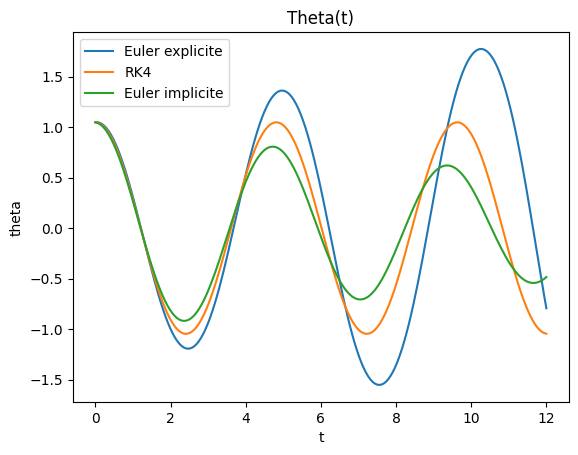

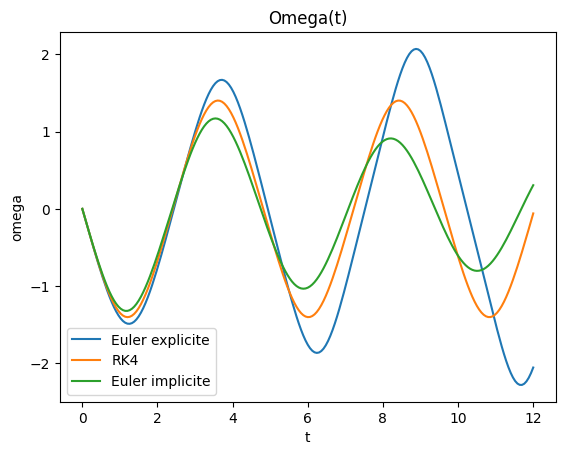

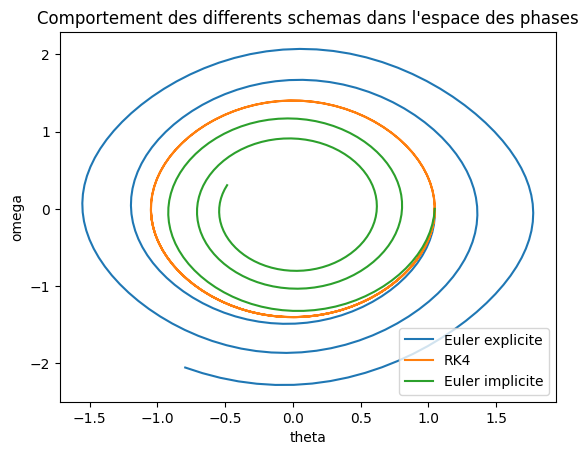

In [30]:
# Euler explicite
X_Euler = Euler(X0,N,T)
theta_Euler , omega_Euler = X_Euler[:,0] , X_Euler[:,1]
# temps
tps = np.linspace(0,T,N+1)
# solve_ivp 
sol_ODE = integrate.solve_ivp(f,(0.,T),X0,max_step=T/N,rtol=1.,atol=1.)
# Euler implicite
sol_EI = Euler_imp(f,df,X0,N,T)
theta_EI, omega_EI = sol_EI[:,0], sol_EI[:,1]


## affichage de theta
plt.figure()
plt.plot(tps,theta_Euler,label="Euler explicite")
plt.plot(sol_ODE.t,sol_ODE.y[0],label="RK4")
plt.plot(tps,theta_EI,label="Euler implicite")
plt.xlabel("t")
plt.ylabel("theta")
plt.title("Theta(t)")
plt.legend()
plt.show()

## affichage de omega
plt.figure()
plt.plot(tps,omega_Euler,label="Euler explicite")
plt.plot(sol_ODE.t,sol_ODE.y[1],label="RK4")
plt.plot(tps,omega_EI,label="Euler implicite")
plt.xlabel("t")
plt.ylabel("omega")
plt.title("Omega(t)")
plt.legend()
plt.show()

## portrait de phases
plt.figure()
plt.plot(theta_Euler,omega_Euler,label="Euler explicite")
plt.plot(sol_ODE.y[0],sol_ODE.y[1],label="RK4")
plt.plot(theta_EI,omega_EI,label="Euler implicite")
plt.xlabel("theta")
plt.ylabel("omega")
plt.title("Comportement des differents schemas dans l'espace des phases")
plt.legend()
plt.show()

